In [191]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import json
limiter=6000
data_path = "/Users/patrycjapiechowicz/Downloads/sample_data_6k (1).jsonl"
import scipy.stats as stats
from scipy.stats import chi2_contingency
with open(data_path) as file:
  data = [json.loads(next(file)) for x in range(limiter)]

In [192]:
df=pd.DataFrame(data)

In [193]:
df.sample(1)

,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,section,imports,exports,datadirectories
2375,11f02a2252c453e96b0565e8d959935cc6c609190e2e1f...,a42f62771e8a1cf29936dfb793adb50d,2018-03,0,,"[6525, 471, 83, 44, 83, 46, 34, 16, 142, 20, 1...","[2048, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 108, 'avlength': 15.39814814814...","{'size': 16896, 'vsize': 24576, 'has_debug': 1...","{'coff': {'timestamp': 1208114112, 'machine': ...","{'entry': '.text', 'sections': [{'name': '.tex...","{'ADVAPI32.dll': ['RegQueryValueExW', 'SetSecu...",[],"[{'name': 'EXPORT_TABLE', 'size': 0, 'virtual_..."


In [194]:
df.shape

(6000, 14)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sha256           6000 non-null   object
 1   md5              6000 non-null   object
 2   appeared         6000 non-null   object
 3   label            6000 non-null   int64 
 4   avclass          6000 non-null   object
 5   histogram        6000 non-null   object
 6   byteentropy      6000 non-null   object
 7   strings          6000 non-null   object
 8   general          6000 non-null   object
 9   header           6000 non-null   object
 10  section          6000 non-null   object
 11  imports          6000 non-null   object
 12  exports          6000 non-null   object
 13  datadirectories  6000 non-null   object
dtypes: int64(1), object(13)
memory usage: 656.4+ KB


In [196]:
df.isnull().sum() #Missing values

sha256             0
md5                0
appeared           0
label              0
avclass            0
histogram          0
byteentropy        0
strings            0
general            0
header             0
section            0
imports            0
exports            0
datadirectories    0
dtype: int64

Let's explore deeper some of the features:

Label:   1- malicious PE file, 0- benaign PE file, -1 - unlabeled PE file - not taken into account in this EDA.
General - general information about a PE file, in details described below.
String - list of nested attributes about string, in details described below.



**1.LABEL**

In [197]:
#1. To check the balance of dataset
df.groupby('label').size()

label
-1    1318
 0    2750
 1    1932
dtype: int64

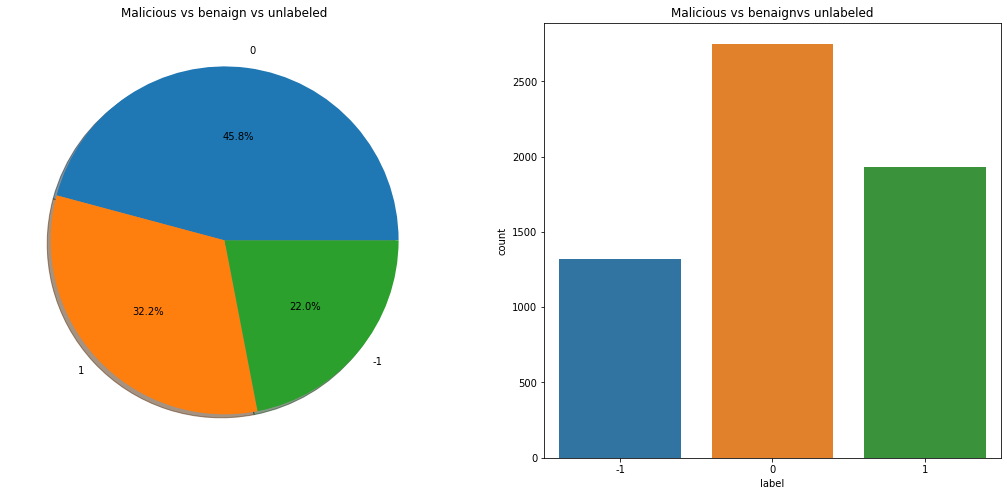

In [198]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Malicious vs benaign vs unlabeled')
ax[0].set_ylabel('')
sns.countplot('label',data=df,ax=ax[1])
ax[1].set_title('Malicious vs benaignvs unlabeled')
plt.show()

In [199]:
df_labeled = df[df['label'] != -1]  

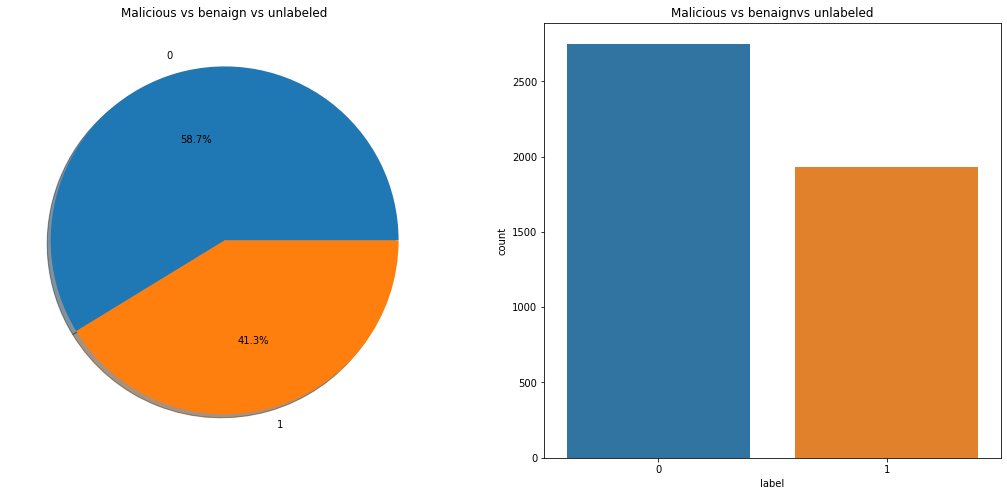

In [200]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_labeled['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Malicious vs benaign vs unlabeled')
ax[0].set_ylabel('')
sns.countplot('label',data=df_labeled,ax=ax[1])
ax[1].set_title('Malicious vs benaignvs unlabeled')
plt.show()

In [201]:
print('Percent of malicious data:', round(sum(df['label']==1)/(sum(df['label']==1)+sum(df['label']==0))*100,2))  # I excluded unlabeled data
print('Percent of benaign data:', round(sum(df['label']==0)/(sum(df['label']==1)+sum(df['label']==0))*100,2))


Percent of malicious data: 41.26
Percent of benaign data: 58.74


**CONCLUSION :**

Unbalanced sample of dataset, we should check the entire dataset and think about taking appropriate steps like oversampling in case of unbalance. Unlabeled instances have been removed.

**2. GENERAL**

In [202]:
df['general'][0]  #Dictionary format

{'size': 3101705,
 'vsize': 380928,
 'has_debug': 0,
 'exports': 0,
 'imports': 156,
 'has_relocations': 0,
 'has_resources': 1,
 'has_signature': 0,
 'has_tls': 0,
 'symbols': 0}

In [203]:
df_general=df.general.apply(pd.Series)

In [204]:
df_general #Unpack attributes of general feature

,size,vsize,has_debug,exports,imports,has_relocations,has_resources,has_signature,has_tls,symbols
0,3101705,380928,0,0,156,0,1,0,0,0
1,504320,524288,1,0,619,0,1,0,0,0
2,180224,180224,1,0,273,1,1,0,0,53
3,2377730,77824,0,0,8,0,1,0,1,0
4,1153808,1167360,1,0,124,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5995,364656,32768,0,0,55,0,1,0,0,0
5996,1232508,360448,0,0,13,1,1,0,1,0
5997,2007257,163840,0,0,124,0,1,0,0,0
5998,4529664,10768384,0,10,2,0,1,0,0,0


In [205]:
pd.options.display.float_format = "{:.2f}".format

In [206]:
df_general.describe()

,size,vsize,has_debug,exports,imports,has_relocations,has_resources,has_signature,has_tls,symbols
count,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00
mean,1472601.49,1640542.37,0.40,27.09,109.24,0.55,0.91,0.24,0.20,77.53
std,5682586.73,6738016.68,0.49,483.52,176.66,0.50,0.28,0.43,0.40,2165.28
min,326.00,512.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,83456.00,86016.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
50%,368288.00,311296.00,0.00,0.00,55.00,1.00,1.00,0.00,0.00,0.00
75%,1220956.00,1134592.00,1.00,0.00,155.00,1.00,1.00,0.00,0.00,0.00
max,230443208.00,176812032.00,1.00,26691.00,4222.00,1.00,1.00,1.00,1.00,131660.00


In [207]:
df_general.dtypes # 10 numerical data features

size               int64
vsize              int64
has_debug          int64
exports            int64
imports            int64
has_relocations    int64
has_resources      int64
has_signature      int64
has_tls            int64
symbols            int64
dtype: object

In [208]:
df_general=df_general.rename(columns={'imports':'imports_general', 'exports': 'exports_general'}) # Changed because we already have features named imports and exports

In [209]:
df_general.sample(2)

,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,symbols
3741,779264,806912,0,0,15,1,1,0,1,0
5916,60192,69632,1,1,74,1,1,1,0,0


CONCLUSION:

General feature has 10 attributes. Attributes will be analyzed after concatinating with all other features. The name of two columns - imports and exports were changed for general_imports and general_exports to avoid repetation throughout the entire dataset.



**3. STRINGS**


In [210]:
df['strings'].sample(2) #dictionary format

2843    {'numstrings': 236, 'avlength': 19.78813559322...
2156    {'numstrings': 1125, 'avlength': 8.96177777777...
Name: strings, dtype: object

In [211]:
df_strings=df.strings.apply(pd.Series)  #Unpack strings feature

In [212]:
df_strings.head(2)

,numstrings,avlength,printabledist,printables,entropy,paths,urls,registry,MZ
0,14573,5.97,"[1046, 817, 877, 803, 738, 909, 831, 842, 871,...",87031,6.57,3,0,0,51
1,1803,11.19,"[231, 31, 81, 57, 72, 75, 51, 45, 65, 51, 44, ...",20178,5.80,0,0,0,3


In [213]:
df_strings.dtypes  # Numercial data, against printabledist

numstrings         int64
avlength         float64
printabledist     object
printables         int64
entropy          float64
paths              int64
urls               int64
registry           int64
MZ                 int64
dtype: object

Concatinate original df + unpacked general and strings

In [214]:
#Concatenate original df + unpacked general and strings
data_all=pd.concat([df,df_general,df_strings], axis=1)

In [215]:
data_all.head(2)

,sha256,md5,appeared,label,avclass,histogram,byteentropy,strings,general,header,...,symbols,numstrings,avlength,printabledist,printables,entropy,paths,urls,registry,MZ
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,63956d6417f8f43357d9a8e79e52257e,2006-12,0,,"[45521, 13095, 12167, 12496, 12429, 11709, 118...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'numstrings': 14573, 'avlength': 5.9720716393...","{'size': 3101705, 'vsize': 380928, 'has_debug'...","{'coff': {'timestamp': 1124149349, 'machine': ...",...,0,14573,5.97,"[1046, 817, 877, 803, 738, 909, 831, 842, 871,...",87031,6.57,3,0,0,51
1,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,6f7bde7a1126debf0cc359a54953efc1,2007-01,0,,"[93059, 15789, 2871, 3005, 4107, 1771, 2918, 4...","[47100, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,...","{'numstrings': 1803, 'avlength': 11.1913477537...","{'size': 504320, 'vsize': 524288, 'has_debug':...","{'coff': {'timestamp': 1091600092, 'machine': ...",...,0,1803,11.19,"[231, 31, 81, 57, 72, 75, 51, 45, 65, 51, 44, ...",20178,5.80,0,0,0,3


In [216]:
print("List of columns:", list(data_all.columns)) # Looks good, we have 33 features
print("-----------------------------------")
print('Shape of the dataset:', data_all.shape)

List of columns: ['sha256', 'md5', 'appeared', 'label', 'avclass', 'histogram', 'byteentropy', 'strings', 'general', 'header', 'section', 'imports', 'exports', 'datadirectories', 'size', 'vsize', 'has_debug', 'exports_general', 'imports_general', 'has_relocations', 'has_resources', 'has_signature', 'has_tls', 'symbols', 'numstrings', 'avlength', 'printabledist', 'printables', 'entropy', 'paths', 'urls', 'registry', 'MZ']
-----------------------------------
Shape of the dataset: (6000, 33)


In [217]:
data_all.drop(['strings','general'], axis=1, inplace=True) # Remove general and strings, as we unpacked them before, and had double data

In [218]:
data_all.columns, data_all.shape #Looks good, one dataframe with unpacked strings and general

(Index(['sha256', 'md5', 'appeared', 'label', 'avclass', 'histogram',
        'byteentropy', 'header', 'section', 'imports', 'exports',
        'datadirectories', 'size', 'vsize', 'has_debug', 'exports_general',
        'imports_general', 'has_relocations', 'has_resources', 'has_signature',
        'has_tls', 'symbols', 'numstrings', 'avlength', 'printabledist',
        'printables', 'entropy', 'paths', 'urls', 'registry', 'MZ'],
       dtype='object'), (6000, 31))

In [219]:
data_all_labeled = data_all[data_all['label'] != -1]  # Remove unlabeled data

In [220]:
print("Shape of the dataset with unpacked features and after removing unlabeled data:",data_all_labeled.shape)  #check :  2750 + 1932= 4682

Shape of the dataset with unpacked features and after removing unlabeled data: (4682, 31)


In [221]:
data_all_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4682 entries, 0 to 5999
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sha256           4682 non-null   object 
 1   md5              4682 non-null   object 
 2   appeared         4682 non-null   object 
 3   label            4682 non-null   int64  
 4   avclass          4682 non-null   object 
 5   histogram        4682 non-null   object 
 6   byteentropy      4682 non-null   object 
 7   header           4682 non-null   object 
 8   section          4682 non-null   object 
 9   imports          4682 non-null   object 
 10  exports          4682 non-null   object 
 11  datadirectories  4682 non-null   object 
 12  size             4682 non-null   int64  
 13  vsize            4682 non-null   int64  
 14  has_debug        4682 non-null   int64  
 15  exports_general  4682 non-null   int64  
 16  imports_general  4682 non-null   int64  
 17  has_relocation

In [222]:
data_all_labeled.describe()

,label,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
count,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00,4682.00
mean,0.41,1405589.05,1568444.79,0.39,31.82,110.27,0.54,0.92,0.22,0.20,71.37,6747.10,33.17,102879.54,5.73,2.55,12.28,0.38,15.82
std,0.49,4859639.67,6745945.61,0.49,544.24,180.32,0.50,0.28,0.42,0.40,2297.67,25678.65,302.47,401084.00,0.70,70.44,53.37,4.39,72.39
min,0.00,642.00,512.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,5.23,17.00,0.18,0.00,0.00,0.00,1.00
25%,0.00,81992.00,86016.00,0.00,0.00,2.00,0.00,1.00,0.00,0.00,0.00,390.00,8.57,5400.00,5.40,0.00,0.00,0.00,1.00
50%,0.00,360448.00,294912.00,0.00,0.00,55.00,1.00,1.00,0.00,0.00,0.00,1497.50,12.99,18895.50,5.81,0.00,0.00,0.00,3.00
75%,1.00,1200220.25,1134592.00,1.00,0.00,155.00,1.00,1.00,0.00,0.00,0.00,4934.00,18.30,66052.25,6.23,1.00,9.00,0.00,9.00
max,1.00,176798728.00,176812032.00,1.00,26691.00,4222.00,1.00,1.00,1.00,1.00,131660.00,829216.00,11992.62,11306316.00,6.58,4679.00,1174.00,271.00,2782.00


**DATA TYPES**

In [223]:
numerical = [var for var in data_all_labeled.columns if data_all_labeled[var].dtype != 'O']
categorical = [var for var in data_all_labeled.columns if data_all_labeled[var].dtype == 'O']
discrete = [
    var for var in numerical
    if len(data_all_labeled[var].unique()) < 20
]

numerical = [
    var for var in numerical if var not in discrete
]

In [224]:
discrete

['label',
 'has_debug',
 'has_relocations',
 'has_resources',
 'has_signature',
 'has_tls']

In [225]:
categorical

['sha256',
 'md5',
 'appeared',
 'avclass',
 'histogram',
 'byteentropy',
 'header',
 'section',
 'imports',
 'exports',
 'datadirectories',
 'printabledist']

In [226]:
numerical

['size',
 'vsize',
 'exports_general',
 'imports_general',
 'symbols',
 'numstrings',
 'avlength',
 'printables',
 'entropy',
 'paths',
 'urls',
 'registry',
 'MZ']

In [227]:
print('There are {} categorical variables'.format(len(categorical)))
print('There are {} discrete variables'.format(len(discrete)))
print('There are {} numerical and continuous variables'.format(len(numerical)))

There are 12 categorical variables
There are 6 discrete variables
There are 13 numerical and continuous variables


In [228]:
#Some usefull function for EDA:

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data_all_labeled[variable], bins = 50, density=True)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

def groupby_feature_mean(variable):
    return data_all_labeled[[variable,'label']].groupby("label", as_index = False).mean() 
    
def groupby_feature_size(variable):
    return data_all_labeled[[variable,"label"]].groupby("label", as_index = False).size() 

def basic_statistics(variable):
    print("Number of unique values for variable:", variable , data_all_labeled[variable].nunique())
    print("Maximum value of variable:",variable, data_all_labeled[variable].max())
    print("Minimum value of variable:",variable, data_all_labeled[variable].min())
    print("Mean value of variable:", variable, round(data_all_labeled[variable].mean(),2))
    
def data_remove_outliers(variable):
    
    data_without_outliers=data_all_labeled[np.abs(data_all_labeled[variable]-data_all_labeled[variable].mean()) <= (3*data_all_labeled[variable].std())]
    print('Number of outliers have been removed:', len(data_all_labeled)-len(remove_outliers(variable)))
    
def plot_hist_without_outliers(variable, bins=50):
    plt.figure(figsize = (9,3))
    plt.hist((data_all_labeled[np.abs(data_all_labeled[variable]-data_all_labeled[variable].mean()) <= (3*data_all_labeled[variable].std())])[variable], bins)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution without outliers with hist".format(variable))
    plt.show()
    
def boxplot(variable):
    plt.figure(figsize = (9,3))
    data_all_labeled[variable].plot.box()
    plt.title("{} distribution with boxplot".format(variable))
    plt.show()

def boxplot_without_outliers(variable):
    plt.figure(figsize = (9,3))
    data_all_labeled[np.abs(data_all_labeled[variable]-data_all_labeled[variable].mean()) <= (3*data_all_labeled[variable].std())][variable].plot.box()
    plt.title("{} distribution without outliers with boxplot".format(variable))
    plt.show()

def countplot(variable):
    return sns.countplot(data_all_labeled[variable])
    plt.show()

def findoutliers(variable):
    outliers=[]
    Q1=variable.quantile(.25)
    Q3=variable.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in variable:
        if out1>upper_limit or out1 < lower_limit:
            outliers.append(out1)
    return np.array(outliers)

def plotchart(variable):
    fix, (ax1,ax2) = plt.subplots(1,2, figsize=(7,5))
    sns.boxplot(variable, orient='v', ax=ax1)
    ax1.set_ylabel=variable.name
    ax1.set_title("Box plot of {}".format(variable.name))
    sns.distplot(variable, ax=ax2)
    ax2.set_title('Distribution plot of {}'.format(variable.name))
    
def analysis_column(variable):
    print('Count of outlier ', len(findoutliers(variable)))
    print('Mean', format(variable.mean()))
    print('Median', format(variable.median()))
    print('Max', format(variable.max()))
    print('Min', format(variable.min()))
    plotchart(variable)
    
from scipy.stats import chi2    
def chi_2(variable):
    cross_table=pd.crosstab(data_all_labeled['label'], data_all_labeled[variable])
    observed=cross_table.values
    values=stats.chi2_contingency(cross_table) 
    expected=values[3]
    no_of_rows=len(cross_table.iloc[0:2,0])
    no_of_cols=len(cross_table.iloc[0,0:2])
    ddof=(no_of_rows-1)*(no_of_cols-1)
    alpha=0.05
    chi_2=sum([(o-e)**2./e for o,e in zip(observed, expected)])
    chi_2_stats=chi_2[0]+chi_2[1]
    critical_value=chi2.ppf(q=1-alpha, df=ddof)
    p_value=1-chi2.cdf(x=chi_2_stats,df=ddof)
    print('chi_2 statistic', chi_2_stats)
    print('critical value', critical_value)
    print('p_value', p_value)
    print("significant level", alpha)
    if chi_2_stats>= critical_value:
        print('Reject H0, There is a relationship between variables')
    else:
        print('Do not reject H0, There is a no relationship between variables')
        
    if p_value <=alpha:
        print('Reject H0, There is a relationship between variables')
    else:
        print('Do not reject H0, There is a no relationship between variables')


**SIZE  - size of the file**,  numerical feature

Count of outlier  458
Mean 1405589.0544639044
Median 360448.0
Max 176798728
Min 642


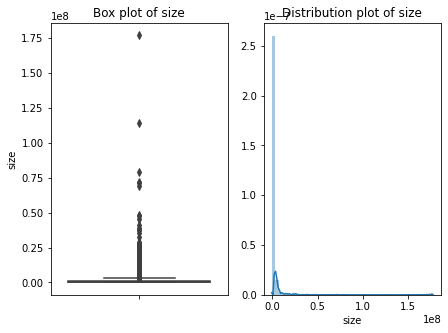

In [229]:
analysis_column(data_all_labeled['size'])

In [230]:
data_all_labeled['size'].nunique()

3262

In [231]:
groupby_feature_mean('size')

,label,size
0,0,1464811.99
1,1,1321291.39


In [232]:
data_all_labeled.groupby("label").mean()

,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
label,,,,,,,,,,,,,,,,,,
0,1464811.99,1407987.56,0.49,49.29,119.50,0.59,0.94,0.28,0.14,93.44,6993.44,19.52,83437.44,5.58,3.01,9.79,0.41,15.41
1,1321291.39,1796838.89,0.25,6.97,97.13,0.48,0.88,0.14,0.28,39.96,6396.47,52.61,130553.33,5.93,1.90,15.81,0.35,16.39


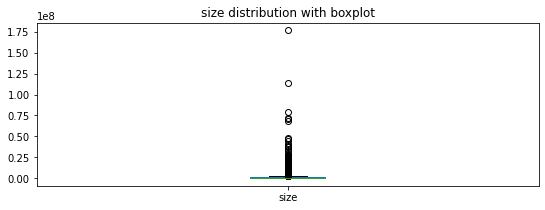

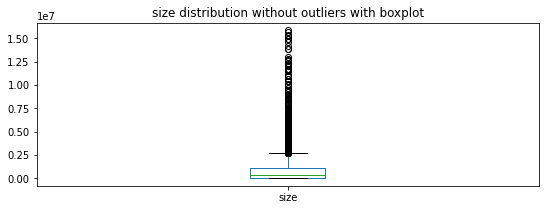

In [233]:
boxplot('size')
boxplot_without_outliers('size')

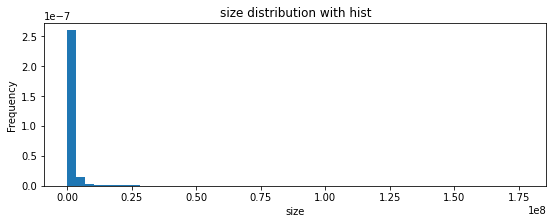

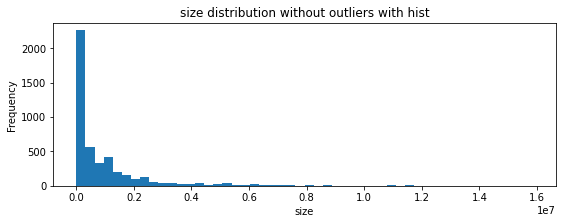

In [234]:
plot_hist('size')
plot_hist_without_outliers('size',50)

# Far away from Gaussian distribution

In [235]:
size_df=pd.DataFrame(data_all_labeled['size'])

In [236]:
size_df.shape

(4682, 1)

In [237]:
#Check how normalization works
from sklearn import preprocessing  # Size variable has huge scale, we have to normalize it or cut into bins - to discuss
size = size_df #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
size_scaled = min_max_scaler.fit_transform(size)
df_size = pd.DataFrame(size_scaled)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f992b301e10>]],
      dtype=object)

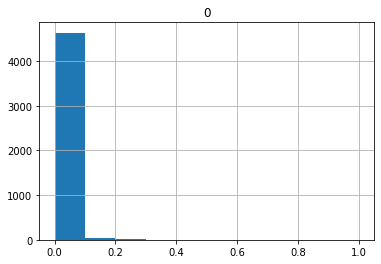

In [238]:
df_size.hist() # Not satisfying results

In [239]:
df_size['size'] = pd.DataFrame(np.random.uniform(-1,1,(10,1)))
df_size['norm'] = (1+df_size[0])/2 # (-1,1] -> (0,1]
df_size['lognorm'] = np.log(df_size['norm'])

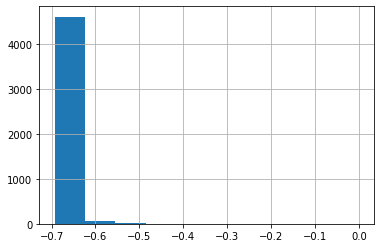

In [240]:
df_size['lognorm'].hist()

In [241]:
#Lets try to cut data into bins
data_all_labeled['size_bins']=pd.cut(data_all_labeled['size'], 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [242]:
data_all_labeled['size_bins'].unique() 

[(-176156.086, 17680450.6], (17680450.6, 35360259.2], (35360259.2, 53040067.8], (70719876.4, 88399685.0], (159118919.4, 176798728.0], (53040067.8, 70719876.4], (106079493.6, 123759302.2]]
Categories (7, interval[float64]): [(-176156.086, 17680450.6] < (17680450.6, 35360259.2] < (35360259.2, 53040067.8] < (53040067.8, 70719876.4] < (70719876.4, 88399685.0] < (106079493.6, 123759302.2] < (159118919.4, 176798728.0]]

In [243]:
data_all_labeled.groupby('size_bins').size()  # Maybe we should remove more outliers

size_bins
(-176156.086, 17680450.6]     4633
(17680450.6, 35360259.2]        36
(35360259.2, 53040067.8]         7
(53040067.8, 70719876.4]         1
(70719876.4, 88399685.0]         3
(88399685.0, 106079493.6]        0
(106079493.6, 123759302.2]       1
(123759302.2, 141439110.8]       0
(141439110.8, 159118919.4]       0
(159118919.4, 176798728.0]       1
dtype: int64

<Figure size 432x288 with 0 Axes>

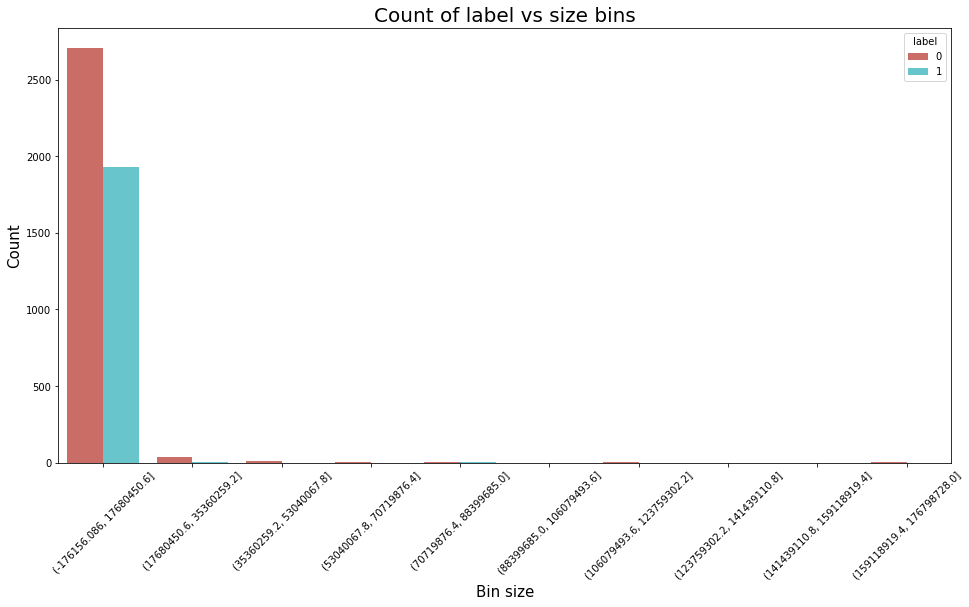

In [244]:
# The most instances is in bin (-176156.086, 8840546.3]

plt.tight_layout() 
plt.figure(figsize=(16,8))
sns.countplot(x="size_bins", hue="label", data=data_all_labeled, palette="hls")
plt.title("Count of label vs size bins",fontsize=20)
plt.xlabel("Bin size",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [245]:
data_all_labeled[['size','label']].corr()

,size,label
size,1.00,-0.01
label,-0.01,1.00


CONCLUSION - Size feature has huge scale. We need to preprocess this feature. The ideas are: 1) Cut it into bins and remove outliers, 2) Normalized it, 3) Both 4) ?
On the first glimse of eye I do not see correlation between size and label.

**2.VSIZE - the virtual size of the file**

Count of outlier  460
Mean 1568444.7936779154
Median 294912.0
Max 176812032
Min 512


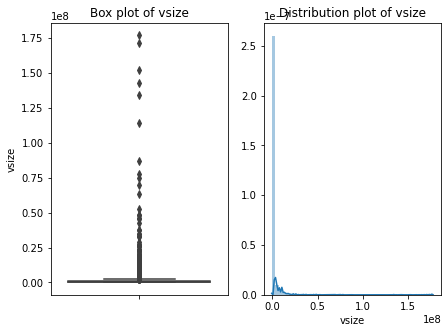

In [246]:
analysis_column(data_all_labeled['vsize'])

In [247]:
data_all_labeled['vsize'].nunique()

879

In [248]:
groupby_feature_mean('vsize')

,label,vsize
0,0,1407987.56
1,1,1796838.89


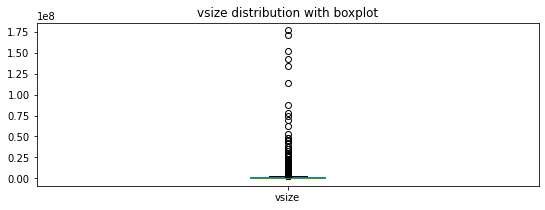

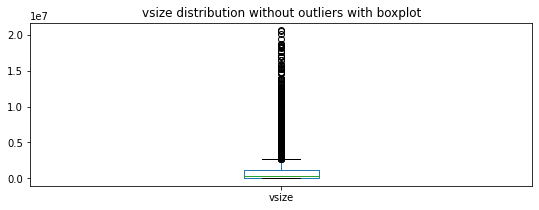

In [249]:
boxplot('vsize')
boxplot_without_outliers('vsize')

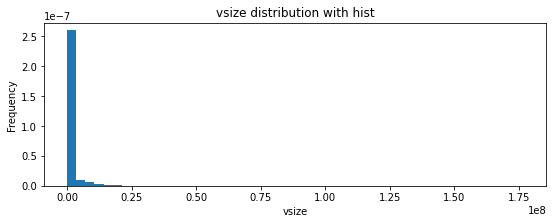

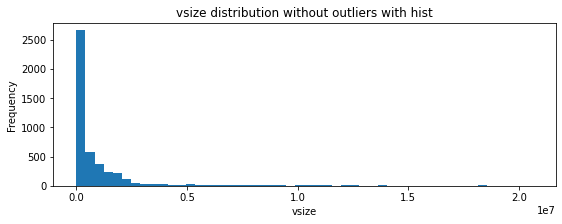

In [250]:
plot_hist('vsize')
plot_hist_without_outliers('vsize',50)

# Far away from Gaussian distribution, right skew

In [251]:
vsize_df=pd.DataFrame(data_all_labeled['vsize'])

In [252]:
#Check how normalization works
from sklearn import preprocessing  # Size variable has huge scale, we have to normalize it or cut into bins - to discuss
vsize = vsize_df #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
size_scaled = min_max_scaler.fit_transform(vsize)
df_vsize = pd.DataFrame(size_scaled)

<function matplotlib.pyplot.show(*args, **kw)>

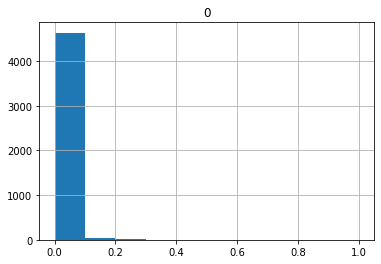

In [253]:
df_vsize.hist() # Not satisfying results
plt.show

In [254]:
df_vsize['size'] = pd.DataFrame(np.random.uniform(-1,1,(10,1)))
df_vsize['norm'] = (1+df_vsize[0])/2 # (-1,1] -> (0,1]
df_vsize['lognorm'] = np.log(df_vsize['norm'])

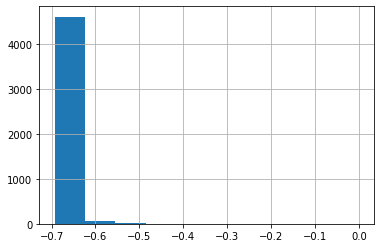

In [255]:
df_vsize['lognorm'].hist()

In [256]:
#Lets try to cut data into bins
data_all_labeled['vsize_bins']=pd.cut(data_all_labeled['vsize'], 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [257]:
data_all_labeled['vsize_bins'].unique() 

[(-176299.52, 17681664.0], (53043968.0, 70725120.0], (17681664.0, 35362816.0], (159130880.0, 176812032.0], (35362816.0, 53043968.0], (141449728.0, 159130880.0], (70725120.0, 88406272.0], (106087424.0, 123768576.0], (123768576.0, 141449728.0]]
Categories (9, interval[float64]): [(-176299.52, 17681664.0] < (17681664.0, 35362816.0] < (35362816.0, 53043968.0] < (53043968.0, 70725120.0] ... (106087424.0, 123768576.0] < (123768576.0, 141449728.0] < (141449728.0, 159130880.0] < (159130880.0, 176812032.0]]

In [258]:
data_all_labeled.groupby('vsize_bins').size()  # Maybe we should remove more outliers

vsize_bins
(-176299.52, 17681664.0]      4633
(17681664.0, 35362816.0]        30
(35362816.0, 53043968.0]         8
(53043968.0, 70725120.0]         2
(70725120.0, 88406272.0]         3
(88406272.0, 106087424.0]        0
(106087424.0, 123768576.0]       1
(123768576.0, 141449728.0]       1
(141449728.0, 159130880.0]       2
(159130880.0, 176812032.0]       2
dtype: int64

<Figure size 432x288 with 0 Axes>

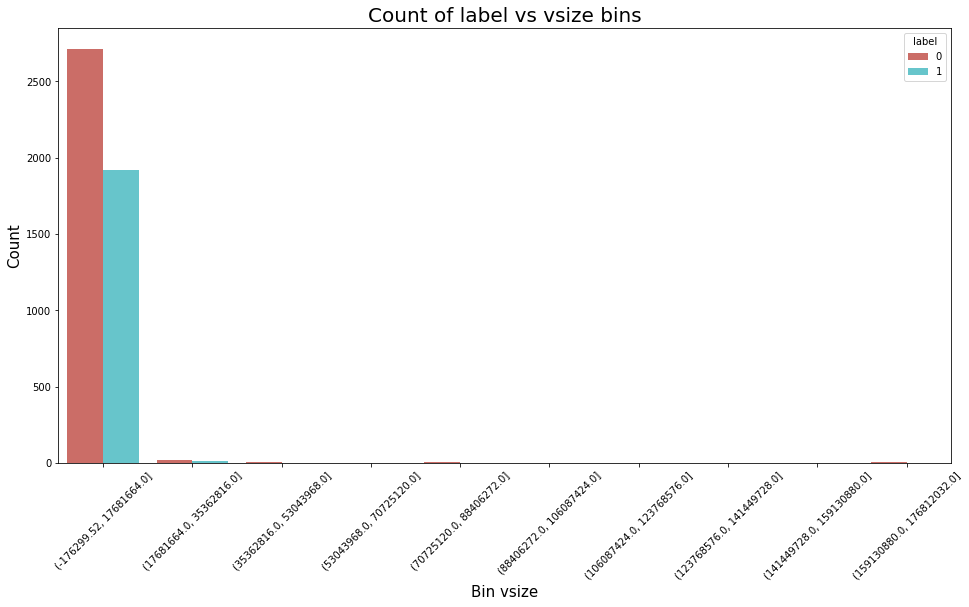

In [259]:
# The most instances is in bin (-176156.086, 8840546.3]

plt.tight_layout() 
plt.figure(figsize=(16,8))
sns.countplot(x="vsize_bins", hue="label", data=data_all_labeled, palette="hls")
plt.title("Count of label vs vsize bins",fontsize=20)
plt.xlabel("Bin vsize",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [260]:
data_all_labeled[['vsize', 'label']].corr()

,vsize,label
vsize,1.00,0.03
label,0.03,1.00


CONCLUSION - Virtual size feature has huge scale. We need to preprocess this feature. The ideas are: 1) Cut it into bins and remove outliers, 2) Normalized it - maybe try boxcox.

For malicioes PE files vsize is smaller than for benaign PE files.

**3.EXPORTS_GENERAL - the number of exported functions**

In [261]:
basic_statistics("exports_general")

Number of unique values for variable: exports_general 165
Maximum value of variable: exports_general 26691
Minimum value of variable: exports_general 0
Mean value of variable: exports_general 31.82


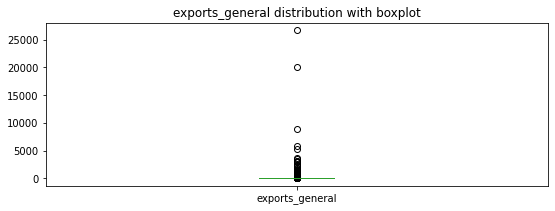

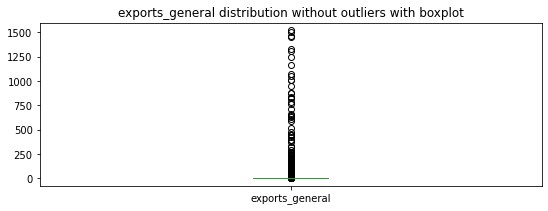

In [262]:
boxplot('exports_general')
boxplot_without_outliers('exports_general')

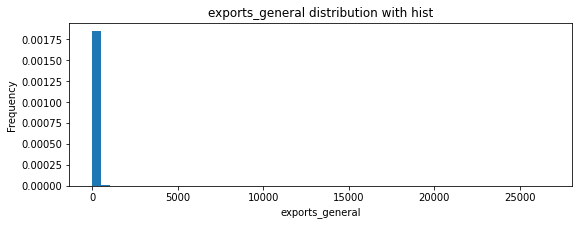

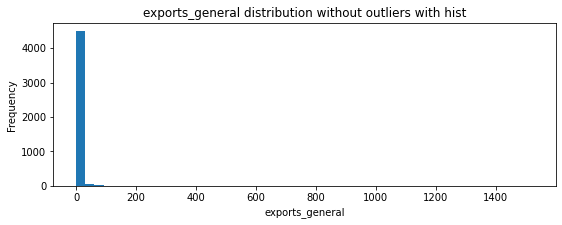

In [263]:
plot_hist('exports_general')
plot_hist_without_outliers('exports_general',50)

# Far away from Gaussian distribution

In [264]:
#Lets try to cut data into bins
data_all_labeled['exports_general_bins']=pd.cut(data_all_labeled['exports_general'], 5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [265]:
data_all_labeled['exports_general_bins'].unique() 

[(-26.691, 5338.2], (21352.8, 26691.0], (5338.2, 10676.4], (16014.6, 21352.8]]
Categories (4, interval[float64]): [(-26.691, 5338.2] < (5338.2, 10676.4] < (16014.6, 21352.8] < (21352.8, 26691.0]]

In [266]:
data_all_labeled.groupby('exports_general_bins').size()

exports_general_bins
(-26.691, 5338.2]     4678
(5338.2, 10676.4]        2
(10676.4, 16014.6]       0
(16014.6, 21352.8]       1
(21352.8, 26691.0]       1
dtype: int64

<Figure size 432x288 with 0 Axes>

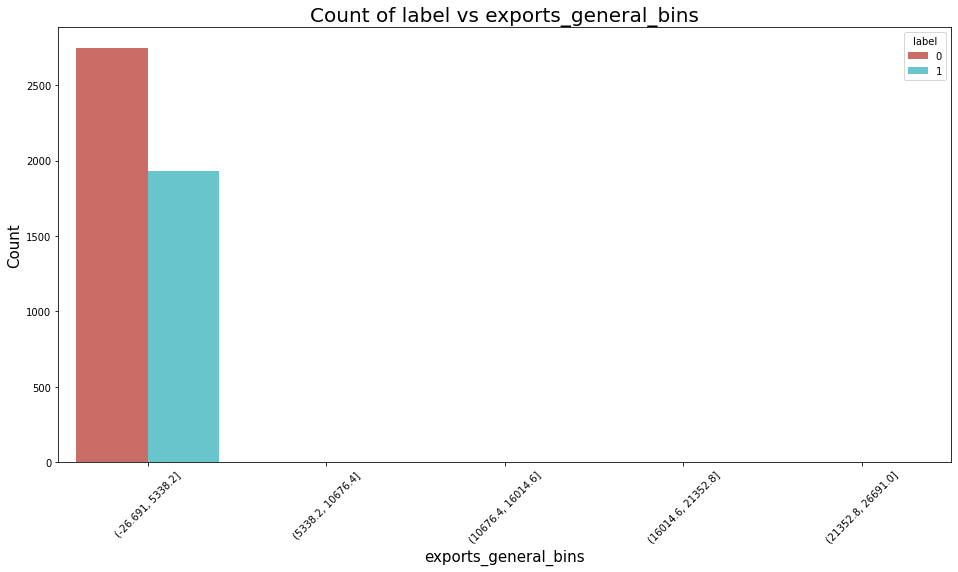

In [267]:
# The most instances is in bin (-176156.086, 8840546.3]

plt.tight_layout() 
plt.figure(figsize=(16,8))
sns.countplot(x="exports_general_bins", hue="label", data=data_all_labeled, palette="hls")
plt.title("Count of label vs exports_general_bins",fontsize=20)
plt.xlabel("exports_general_bins",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [268]:
data_all_labeled[['exports_general', 'label']].corr()

,exports_general,label
exports_general,1.00,-0.04
label,-0.04,1.00


Conclusion - no correlation

**4. IMPORTS_GENERAL - number of imported functions, continuous feature**

In [269]:
basic_statistics("imports_general")

Number of unique values for variable: imports_general 522
Maximum value of variable: imports_general 4222
Minimum value of variable: imports_general 0
Mean value of variable: imports_general 110.27


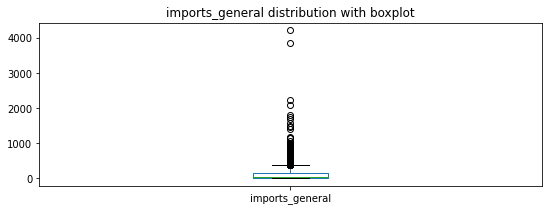

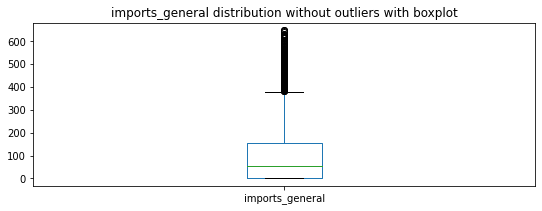

In [270]:
boxplot('imports_general')
boxplot_without_outliers('imports_general')

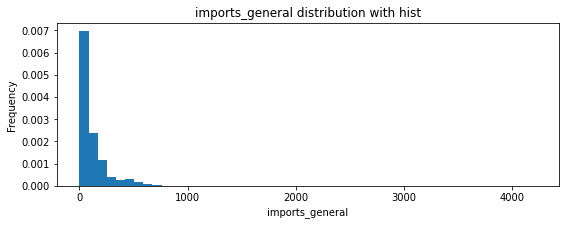

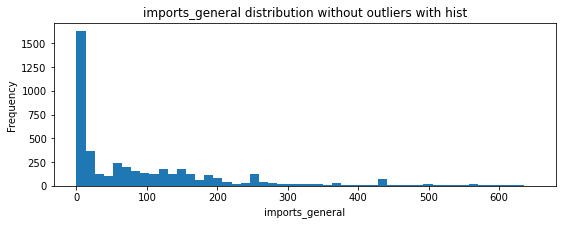

In [271]:
plot_hist('imports_general')
plot_hist_without_outliers('imports_general',50)

# Right skew

In [272]:
import_df=pd.DataFrame(data_all_labeled['imports_general'])

In [273]:
#Check how normalization works
importdf = import_df #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
import_scaled = min_max_scaler.fit_transform(importdf)
importdf = pd.DataFrame(import_scaled)

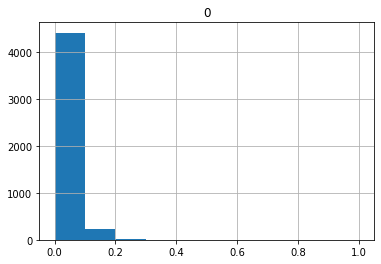

In [274]:
importdf.hist() # Not satisfying results
plt.show()

In [275]:
importdf['size'] = pd.DataFrame(np.random.uniform(-1,1,(10,1)))
importdf['norm'] = (1+importdf[0])/2 # (-1,1] -> (0,1]
importdf['lognorm'] = np.log(importdf['norm'])

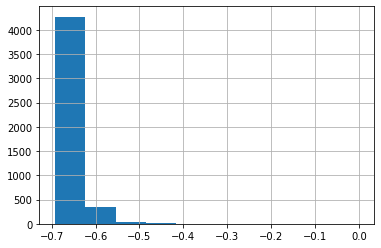

In [276]:
importdf['lognorm'].hist()

In [277]:
#Lets try to cut data into bins
data_all_labeled['imports_bins']=pd.cut(data_all_labeled['imports_general'], 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [278]:
data_all_labeled['imports_bins'].unique() 

[(-4.222, 422.2], (422.2, 844.4], (2111.0, 2533.2], (844.4, 1266.6], (3799.8, 4222.0], (1688.8, 2111.0], (1266.6, 1688.8]]
Categories (7, interval[float64]): [(-4.222, 422.2] < (422.2, 844.4] < (844.4, 1266.6] < (1266.6, 1688.8] < (1688.8, 2111.0] < (2111.0, 2533.2] < (3799.8, 4222.0]]

<Figure size 432x288 with 0 Axes>

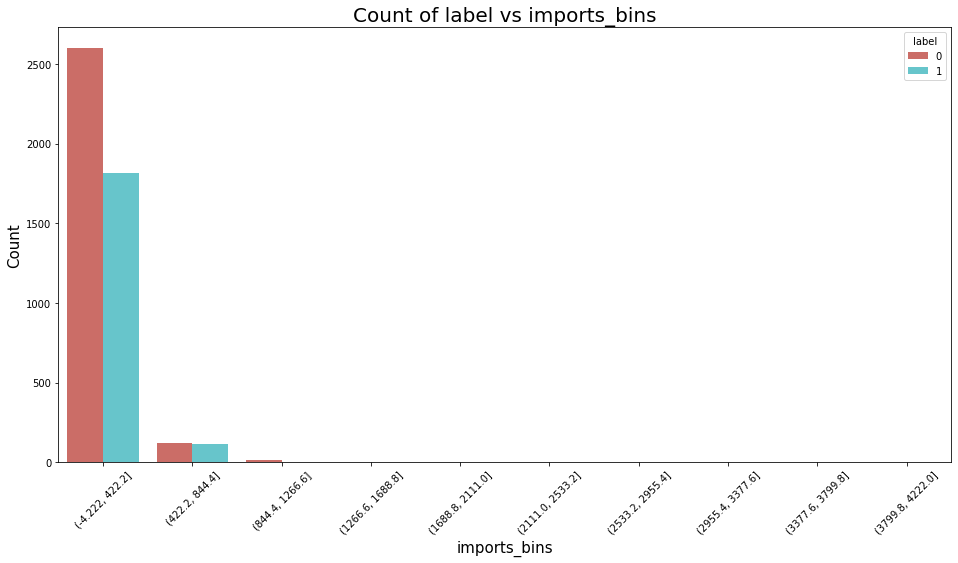

In [279]:
# The most instances is in bin (-176156.086, 8840546.3]

plt.tight_layout() 
plt.figure(figsize=(16,8))
sns.countplot(x="imports_bins", hue="label", data=data_all_labeled, palette="hls")
plt.title("Count of label vs imports_bins",fontsize=20)
plt.xlabel("imports_bins",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [280]:
data_all_labeled[['imports_general', 'label']].corr()

,imports_general,label
imports_general,1.00,-0.06
label,-0.06,1.00


CONCLUSION - No correlation

**5. HAS_DEBUG  - discrete feature, information wheater PE file has debug**

In [281]:
data_all_labeled.groupby('has_debug').mean()

,label,size,vsize,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
has_debug,,,,,,,,,,,,,,,,,,
0,0.51,1460800.34,1658786.86,22.37,91.09,0.44,0.89,0.13,0.21,113.78,7593.26,29.45,118461.39,5.78,3.50,10.35,0.37,17.09
1,0.26,1319775.12,1428027.69,46.52,140.07,0.71,0.95,0.37,0.18,5.46,5431.93,38.95,78660.93,5.64,1.09,15.26,0.40,13.84


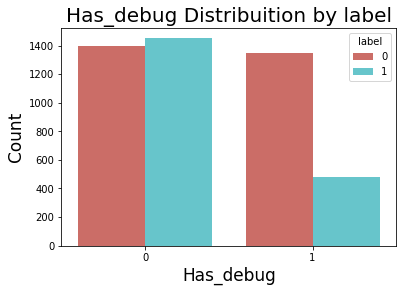

In [282]:
sns.countplot(x="has_debug", data=data_all_labeled, hue="label",palette="hls")
plt.title('Has_debug Distribuition by label', fontsize=20)
plt.xlabel('Has_debug',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

#We see that if there is no debug the probability of malicious PE increases

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


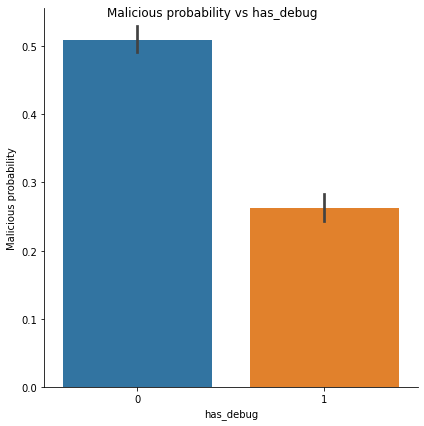

In [283]:
g = sns.factorplot(x = "has_debug", y = "label", data = data_all_labeled, kind = "bar", size = 6)
g.set_ylabels("Malicious probability")
g.fig.suptitle("Malicious probability vs has_debug")
plt.show()

#We see that if there is no debug the probability of malicious PE increases

In [284]:
chi_2('has_debug')

chi_2 statistic 282.55470729409893
critical value 3.841458820694124
p_value 0.0
significant level 0.05
Reject H0, There is a relationship between variables
Reject H0, There is a relationship between variables


CONCLUSION - keep the variable, as there is a correlation between variable and label.

**6. HAS_RELOCATION  - categorical feature, information wheater PE file has relocation**

In [285]:
data_all_labeled.groupby('has_relocations').mean()

,label,size,vsize,has_debug,exports_general,imports_general,has_resources,has_signature,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
has_relocations,,,,,,,,,,,,,,,,,,
0,0.47,1456292.14,1588640.61,0.25,4.32,105.59,0.91,0.12,0.14,106.37,7290.25,20.17,81718.55,5.77,1.65,7.51,0.36,17.17
1,0.36,1362904.32,1551442.81,0.51,54.98,114.20,0.92,0.31,0.24,41.91,6289.85,44.11,120694.06,5.69,3.32,16.29,0.40,14.67


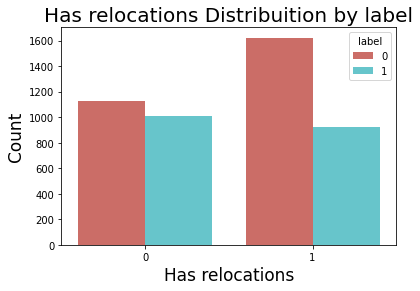

In [286]:
sns.countplot(x="has_relocations", data=data_all_labeled, hue="label",palette="hls")
plt.title('Has relocations Distribuition by label', fontsize=20)
plt.xlabel('Has relocations',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

#We see that if there is no debug the probability of malicious PE increases

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


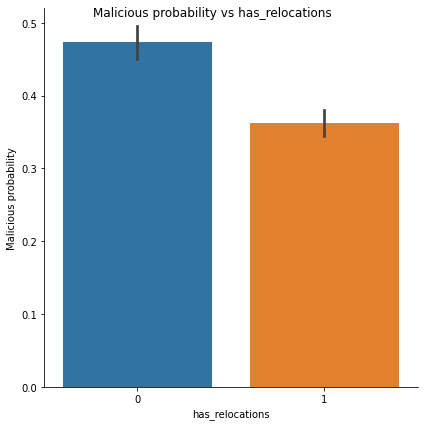

In [287]:
g = sns.factorplot(x = "has_relocations", y = "label", data = data_all_labeled, kind = "bar", size = 6)
g.set_ylabels("Malicious probability")
g.fig.suptitle("Malicious probability vs has_relocations")
plt.show()

#We see that if there is no relocations the probability of malicious PE increases

In [288]:
chi_2('has_relocations')

chi_2 statistic 59.04054811221809
critical value 3.841458820694124
p_value 1.5432100042289676e-14
significant level 0.05
Reject H0, There is a relationship between variables
Reject H0, There is a relationship between variables


CONCLUSION - keep the variable, as there is a correlation between variable and label.

**7. HAS_RESOURCES  - categorical feature, information wheater PE file has resources**

In [289]:
data_all_labeled.groupby('has_resources').mean()

,label,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_signature,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
has_resources,,,,,,,,,,,,,,,,,,
0,0.60,702521.33,1168363.61,0.23,30.83,64.75,0.50,0.05,0.20,105.08,2467.28,32.40,37771.65,5.74,0.22,5.13,0.41,5.67
1,0.40,1470727.42,1605511.83,0.41,31.92,114.49,0.55,0.24,0.20,68.25,7143.62,33.24,108911.70,5.72,2.77,12.94,0.38,16.76


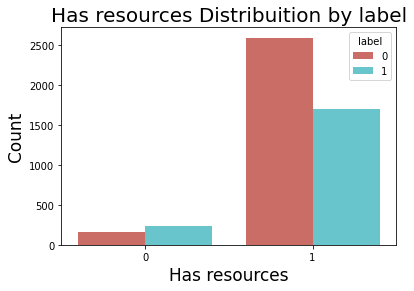

In [290]:
sns.countplot(x="has_resources", data=data_all_labeled, hue="label",palette="hls")
plt.title('Has resources Distribuition by label', fontsize=20)
plt.xlabel('Has resources',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

#We see that if there is no debug the probability of malicious PE increases

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


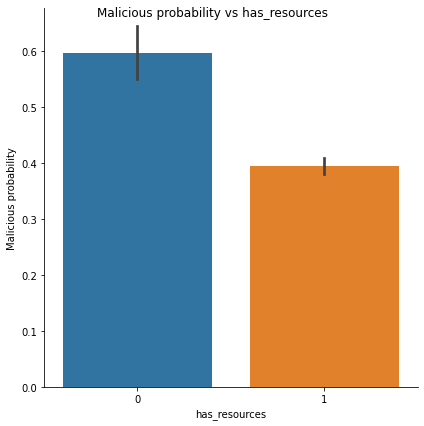

In [291]:
g = sns.factorplot(x = "has_resources", y = "label", data = data_all_labeled, kind = "bar", size = 6)
g.set_ylabels("Malicious probability")
g.fig.suptitle("Malicious probability vs has_resources")
plt.show()

#We see that if there is no resources the probability of malicious PE increases

In [292]:
chi_2('has_resources')

chi_2 statistic 60.81364476826225
critical value 3.841458820694124
p_value 6.328271240363392e-15
significant level 0.05
Reject H0, There is a relationship between variables
Reject H0, There is a relationship between variables


CONCLUSION - keep the variable, as there is a correlation between variable and label.

**8. HAS_SIGNATURE  - categorical feature, information wheater PE file has signature**

In [293]:
data_all_labeled.groupby('has_signature').mean()

,label,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_tls,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
has_signature,,,,,,,,,,,,,,,,,,
0,0.46,1124080.09,1426730.63,0.32,25.82,96.81,0.48,0.90,0.17,90.47,5713.67,37.37,99048.71,5.70,2.87,4.22,0.31,12.91
1,0.26,2390194.38,2064104.02,0.65,52.81,157.33,0.75,0.98,0.30,4.57,10361.65,18.48,116278.24,5.83,1.45,40.44,0.63,25.99


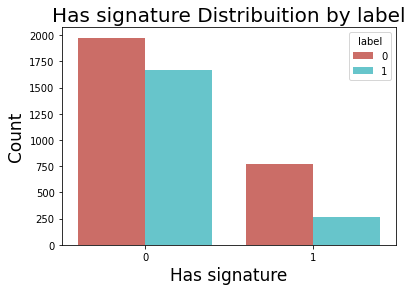

In [294]:
sns.countplot(x="has_signature", data=data_all_labeled, hue="label",palette="hls")
plt.title('Has signature Distribuition by label', fontsize=20)
plt.xlabel('Has signature',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

#We see that if there is no debug the probability of malicious PE increases

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


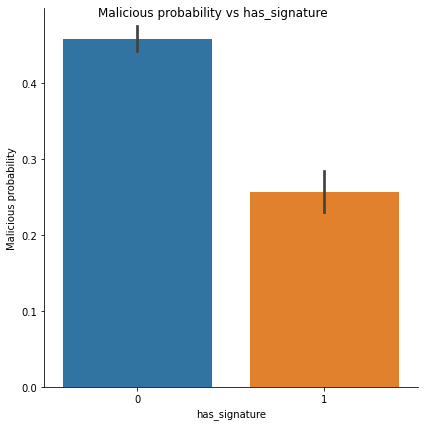

In [295]:
g = sns.factorplot(x = "has_signature", y = "label", data = data_all_labeled, kind = "bar", size = 6)
g.set_ylabels("Malicious probability")
g.fig.suptitle("Malicious probability vs has_signature")
plt.show()

#We see that if there is no signature the probability of malicious PE increases

CONCLUSION -

**8. HAS_TLS  - categorical feature, information wheater PE file has tls**

In [296]:
data_all_labeled.groupby('has_tls').mean()

,label,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,symbols,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
has_tls,,,,,,,,,,,,,,,,,,
0,0.37,1133911.66,1188243.56,0.40,25.27,99.22,0.51,0.92,0.19,8.21,5280.41,34.58,65531.80,5.66,1.56,11.50,0.31,13.99
1,0.59,2515012.17,3121036.37,0.36,58.60,155.39,0.66,0.91,0.34,329.31,12736.51,27.42,255392.93,5.99,6.63,15.46,0.67,23.27


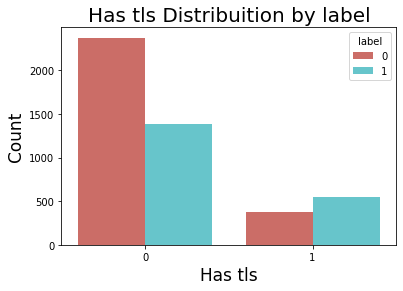

In [297]:
sns.countplot(x="has_tls", data=data_all_labeled, hue="label",palette="hls")
plt.title('Has tls Distribuition by label', fontsize=20)
plt.xlabel('Has tls',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

#We see that if there is no debug the probability of malicious PE increases

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


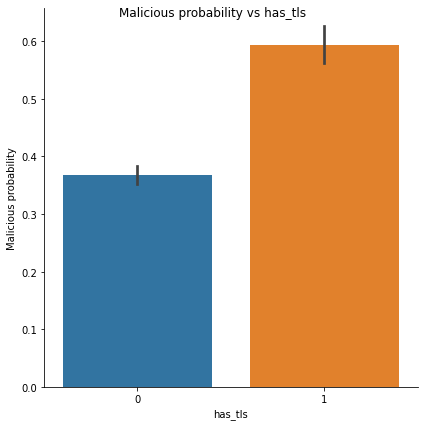

In [298]:
g = sns.factorplot(x = "has_tls", y = "label", data = data_all_labeled, kind = "bar", size = 6)
g.set_ylabels("Malicious probability")
g.fig.suptitle("Malicious probability vs has_tls")
plt.show()

#We see that if there is tls the probability of malicious PE increases

In [299]:
chi_2('has_tls')

chi_2 statistic 155.44932935917714
critical value 3.841458820694124
p_value 0.0
significant level 0.05
Reject H0, There is a relationship between variables
Reject H0, There is a relationship between variables


CONCLUSION -keep the variable, as there is a correlation between variable and label.

**8. SYMBOLS  -**

In [300]:
basic_statistics('symbols')

Number of unique values for variable: symbols 47
Maximum value of variable: symbols 131660
Minimum value of variable: symbols 0
Mean value of variable: symbols 71.37


In [301]:
data_all_labeled.symbols.unique()

array([     0,     53,   5276,   1622,   5504,    364,   1146,      4,
           33,     26,   1071,    865,     46,     38,     12,     15,
           19,     62,   3707,  18772,  71468,   2400,   1621,    329,
         3253,    191,   1641, 131660,    375,     98,    640,    387,
          534,    104,     54,    843,  31277,   1321,   9391,    186,
         1005,     63,  26292,   8879,     37,    915,    526])

In [302]:
data_all_labeled.symbols.unique()

array([     0,     53,   5276,   1622,   5504,    364,   1146,      4,
           33,     26,   1071,    865,     46,     38,     12,     15,
           19,     62,   3707,  18772,  71468,   2400,   1621,    329,
         3253,    191,   1641, 131660,    375,     98,    640,    387,
          534,    104,     54,    843,  31277,   1321,   9391,    186,
         1005,     63,  26292,   8879,     37,    915,    526])

In [303]:
data_all_labeled[["symbols","label"]].groupby(["label"], as_index = False).mean() 

,label,symbols
0,0,93.44
1,1,39.96


In [304]:
data_all_labeled.groupby('symbols').mean()  #For particular symbols label is always 1.

,label,size,vsize,has_debug,exports_general,imports_general,has_relocations,has_resources,has_signature,has_tls,numstrings,avlength,printables,entropy,paths,urls,registry,MZ
symbols,,,,,,,,,,,,,,,,,,
0,0.41,1402521.85,1535630.26,0.39,31.97,110.18,0.54,0.92,0.22,0.19,6682.91,33.33,98918.80,5.73,2.50,12.34,0.38,15.91
4,0.00,8976.00,16384.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,10.00,15.90,159.00,4.91,0.00,0.00,0.00,1.00
12,0.00,261120.00,90112.00,1.00,0.00,124.00,0.00,1.00,1.00,0.00,367.00,11.17,4101.00,5.70,0.00,0.00,0.00,1.00
15,0.00,237152.00,274432.00,0.00,192.00,112.00,1.00,1.00,1.00,0.00,1519.00,13.69,20794.00,5.65,7.00,38.00,0.00,1.00
19,0.00,9912.00,45056.00,1.00,5.00,12.00,1.00,0.00,0.00,0.00,68.00,14.81,1007.00,5.13,0.00,0.00,0.00,1.00
26,0.00,73728.00,69632.00,1.00,23.00,107.00,1.00,1.00,0.00,0.00,853.00,18.82,16056.00,4.86,0.00,0.00,0.00,1.00
33,0.00,86546.00,194560.00,1.00,27.00,58.50,0.50,0.50,0.00,0.00,557.00,10.47,5757.50,5.96,0.00,0.00,0.00,1.50
37,0.00,22807.00,57344.00,1.00,1.00,28.00,1.00,0.00,0.00,0.00,211.00,15.05,3176.00,5.32,0.00,0.00,0.00,1.00
38,1.00,727523.00,319488.00,0.00,0.00,76.00,0.00,1.00,0.00,0.00,1122.00,8.12,9113.00,5.79,0.00,0.00,0.00,1.00


In [305]:
data_all_labeled[['label','symbols']].corr()

,label,symbols
label,1.00,-0.01
symbols,-0.01,1.00


CONCLUSION - there are symbols that belongs only to label 1.

**9. NUMSTRINGS -**

In [306]:
basic_statistics('numstrings')

Number of unique values for variable: numstrings 2905
Maximum value of variable: numstrings 829216
Minimum value of variable: numstrings 2
Mean value of variable: numstrings 6747.1


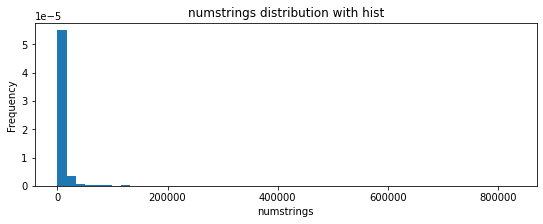

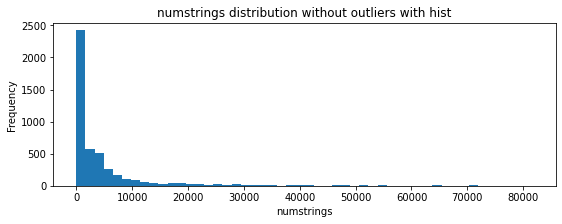

In [307]:
plot_hist('numstrings')
plot_hist_without_outliers('numstrings',50)

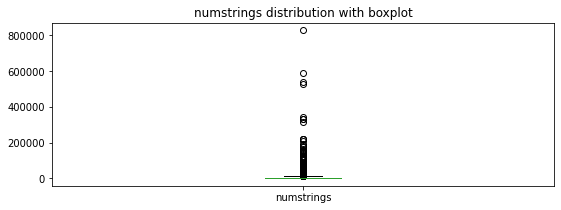

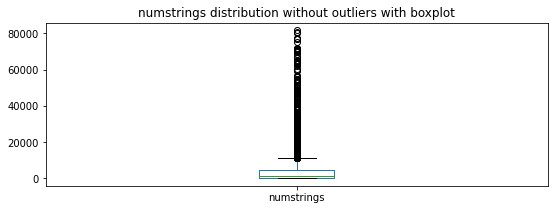

In [308]:
boxplot('numstrings')
boxplot_without_outliers('numstrings')

In [309]:
#Lets try to cut data into bins
data_all_labeled['numstrings_bins']=pd.cut(data_all_labeled['numstrings'], 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [310]:
data_all_labeled['numstrings_bins'].unique() 

[(-827.214, 82923.4], (82923.4, 165844.8], (165844.8, 248766.2], (331687.6, 414609.0], (746294.6, 829216.0], (248766.2, 331687.6], (497530.4, 580451.8], (580451.8, 663373.2]]
Categories (8, interval[float64]): [(-827.214, 82923.4] < (82923.4, 165844.8] < (165844.8, 248766.2] < (248766.2, 331687.6] < (331687.6, 414609.0] < (497530.4, 580451.8] < (580451.8, 663373.2] < (746294.6, 829216.0]]

<Figure size 432x288 with 0 Axes>

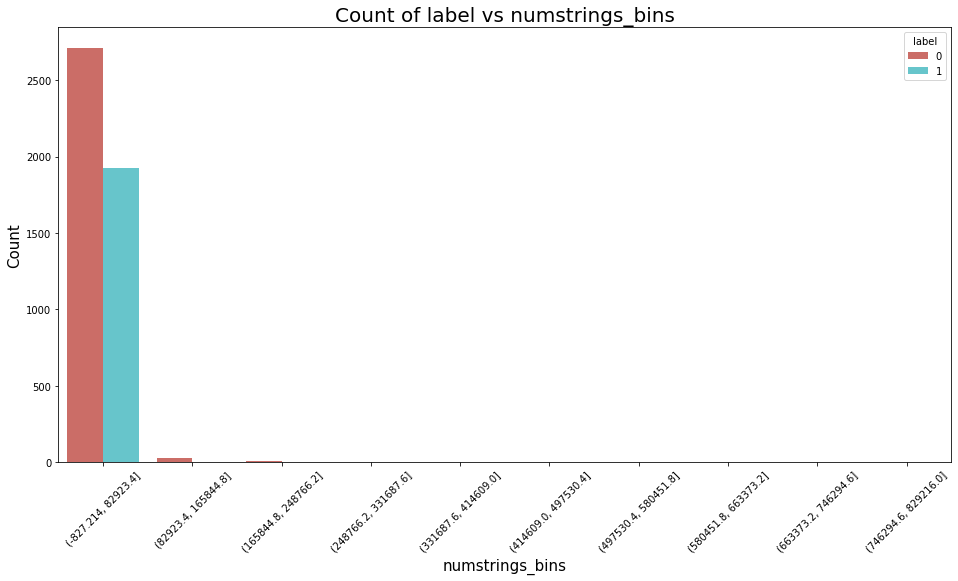

In [311]:
# The most instances is in bin (-176156.086, 8840546.3]

plt.tight_layout() 
plt.figure(figsize=(16,8))
sns.countplot(x="numstrings_bins", hue="label", data=data_all_labeled, palette="hls")
plt.title("Count of label vs numstrings_bins",fontsize=20)
plt.xlabel("numstrings_bins",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [312]:
data_all_labeled[['label','numstrings']].corr()

,label,numstrings
label,1.00,-0.01
numstrings,-0.01,1.00


CONCLUSION - no correlation

**9. AVLENGTH -**

In [313]:
basic_statistics('avlength')

Number of unique values for variable: avlength 4418
Maximum value of variable: avlength 11992.61616161616
Minimum value of variable: avlength 5.233311081441922
Mean value of variable: avlength 33.17


In [314]:
data_all_labeled[["avlength","label"]].groupby(["label"], as_index = False).mean() 

,label,avlength
0,0,19.52
1,1,52.61


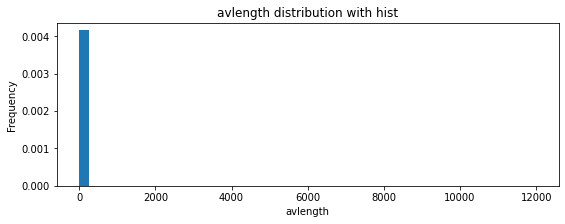

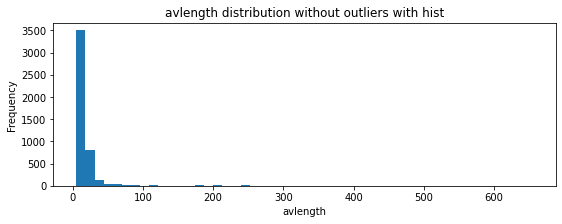

In [315]:
plot_hist('avlength')
plot_hist_without_outliers('avlength',50)

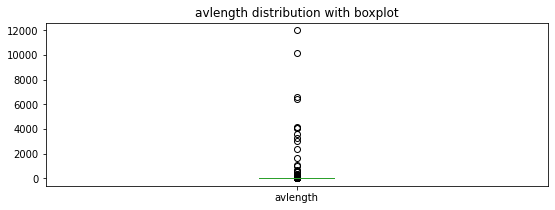

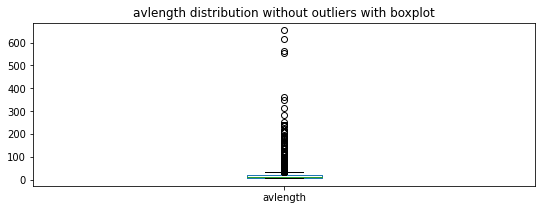

In [316]:
boxplot('avlength')
boxplot_without_outliers('avlength')

In [317]:
#Lets try to cut data into bins
data_all_labeled['avlength_bins']=pd.cut(data_all_labeled['avlength'], 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 432x288 with 0 Axes>

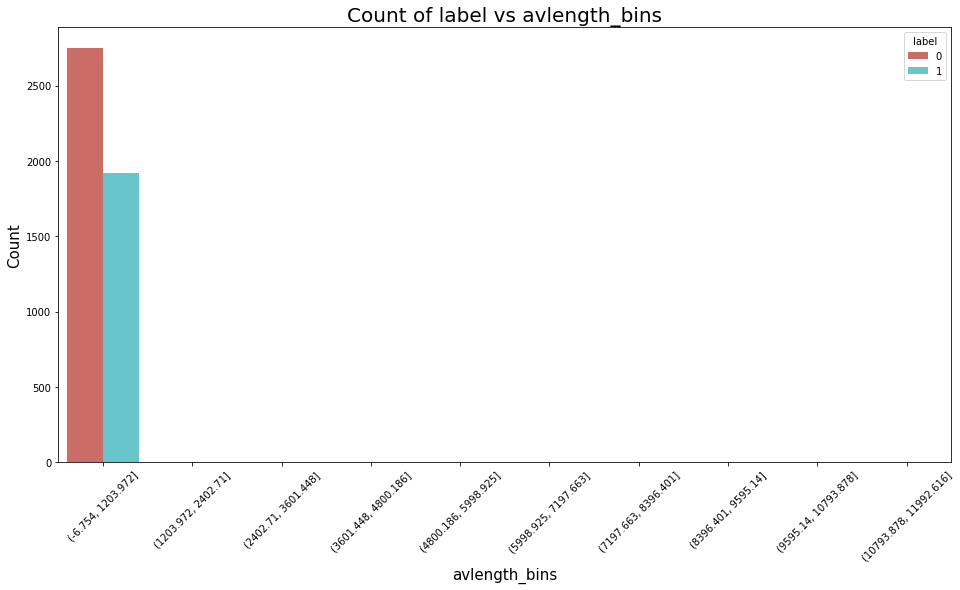

In [318]:
# The most instances is in bin (-176156.086, 8840546.3]

plt.tight_layout() 
plt.figure(figsize=(16,8))
sns.countplot(x="avlength_bins", hue="label", data=data_all_labeled, palette="hls")
plt.title("Count of label vs avlength_bins",fontsize=20)
plt.xlabel("avlength_bins",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [319]:
data_all_labeled[['label', 'avlength']].corr()

,label,avlength
label,1.00,0.05
avlength,0.05,1.00


CONCLUSION - no correlation

**10. ENTROPY -**

In [320]:
basic_statistics('entropy')

Number of unique values for variable: entropy 4561
Maximum value of variable: entropy 6.584920302022384
Minimum value of variable: entropy 0.17883717969476812
Mean value of variable: entropy 5.73


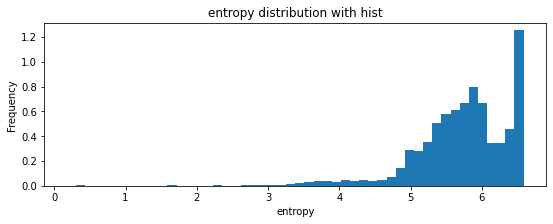

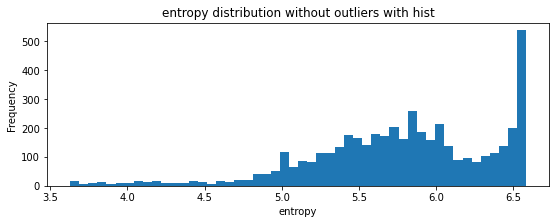

In [321]:
plot_hist('entropy')
plot_hist_without_outliers('entropy',50)

In [322]:
data_all_labeled[["entropy","label"]].groupby(["label"], as_index = False).mean() #Almost the same for both classes

,label,entropy
0,0,5.58
1,1,5.93


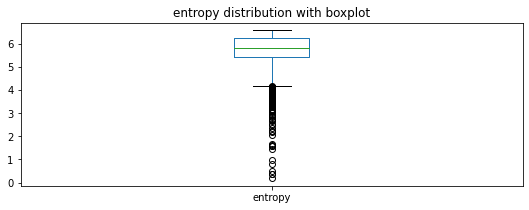

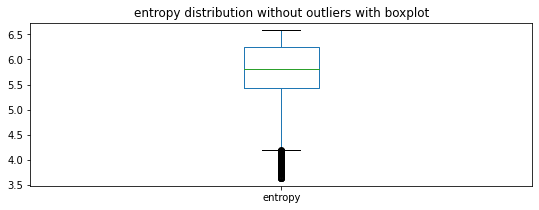

In [323]:
boxplot('entropy')
boxplot_without_outliers('entropy')

In [324]:
data_all_labeled[['label', 'entropy']].corr()

,label,entropy
label,1.00,0.25
entropy,0.25,1.00


CONCLUSION - 

**11. PATHS -**

In [325]:
basic_statistics('paths')

Number of unique values for variable: paths 52
Maximum value of variable: paths 4679
Minimum value of variable: paths 0
Mean value of variable: paths 2.55


In [326]:
data_all_labeled[["paths","label"]].groupby(["label"], as_index = False).mean() 

,label,paths
0,0,3.01
1,1,1.90


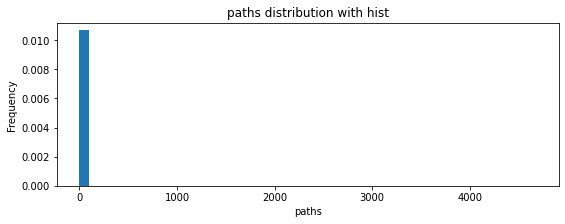

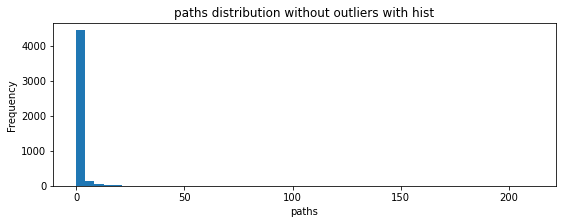

In [327]:
plot_hist('paths')
plot_hist_without_outliers('paths',50)

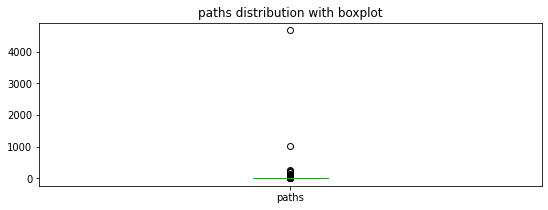

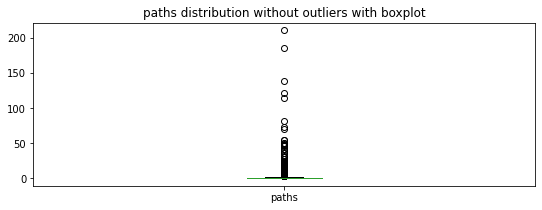

In [328]:
boxplot('paths')
boxplot_without_outliers('paths')

In [329]:
data_all_labeled[['label', 'paths']].corr()

,label,paths
label,1.00,-0.01
paths,-0.01,1.00


CONCLUSION - no correlation

**12. URL -**

In [330]:
basic_statistics('urls')

Number of unique values for variable: urls 149
Maximum value of variable: urls 1174
Minimum value of variable: urls 0
Mean value of variable: urls 12.28


In [331]:
data_all_labeled[["urls","label"]].groupby(["label"], as_index = False).mean() 

,label,urls
0,0,9.79
1,1,15.81


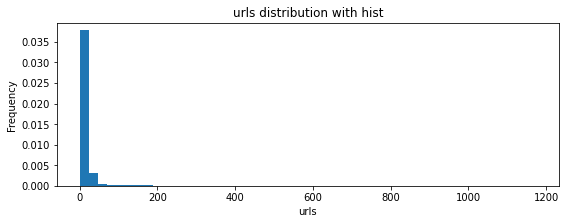

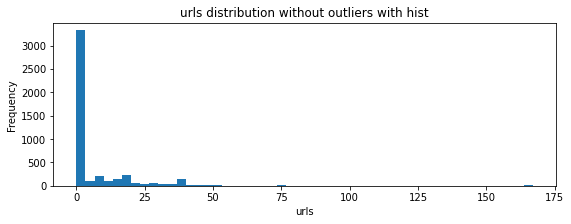

In [332]:
plot_hist('urls')
plot_hist_without_outliers('urls',50)

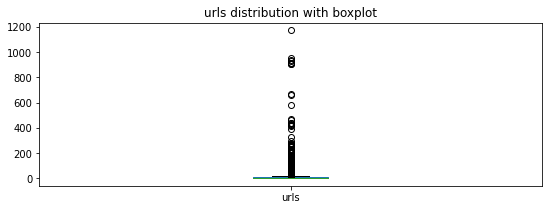

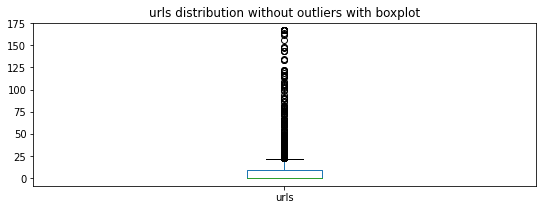

In [333]:
boxplot('urls')
boxplot_without_outliers('urls')

In [334]:
data_all_labeled[['label', 'urls']].corr()

,label,urls
label,1.00,0.06
urls,0.06,1.00


CONCLUSION - no correlation

**11. MZ -**

In [335]:
basic_statistics('MZ')

Number of unique values for variable: MZ 185
Maximum value of variable: MZ 2782
Minimum value of variable: MZ 1
Mean value of variable: MZ 15.82


In [336]:
data_all_labeled[["MZ","label"]].groupby(["label"], as_index = False).mean() 

,label,MZ
0,0,15.41
1,1,16.39


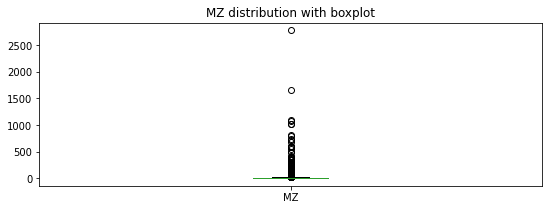

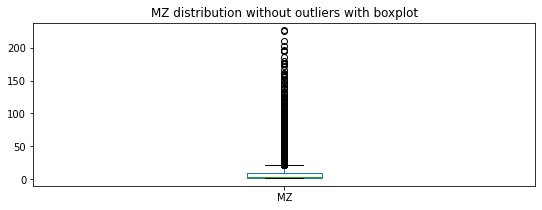

In [337]:
boxplot('MZ')
boxplot_without_outliers('MZ')

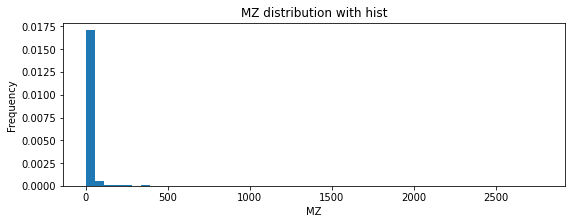

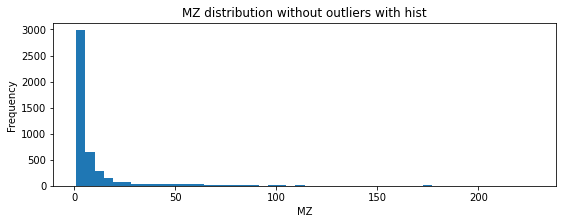

In [338]:
plot_hist('MZ')
plot_hist_without_outliers('MZ',50)

In [339]:
data_all_labeled[['label', 'MZ']].corr()

,label,MZ
label,1.00,0.01
MZ,0.01,1.00


CONCLUSION - no correlation

**12.registry**

In [340]:
basic_statistics('registry')

Number of unique values for variable: registry 24
Maximum value of variable: registry 271
Minimum value of variable: registry 0
Mean value of variable: registry 0.38


In [341]:
data_all_labeled[["registry","label"]].groupby(["label"], as_index = False).mean() 

,label,registry
0,0,0.41
1,1,0.35


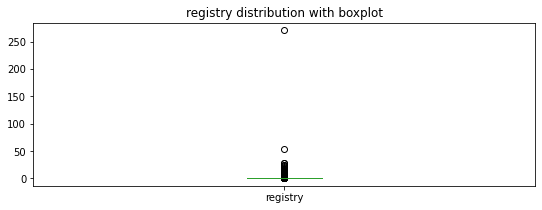

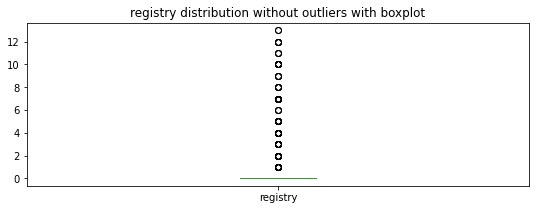

In [342]:
boxplot('registry')
boxplot_without_outliers('registry')

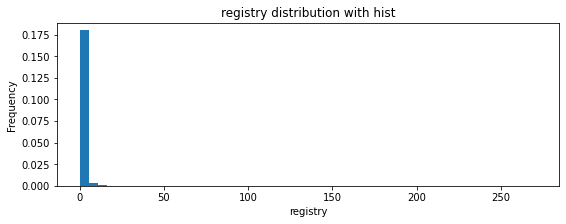

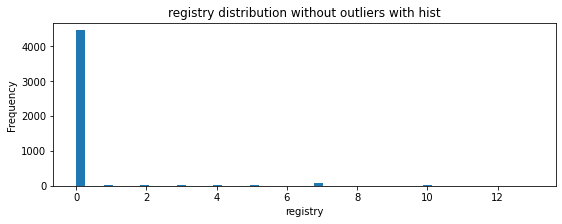

In [343]:
plot_hist('registry')
plot_hist_without_outliers('registry',50)

In [344]:
data_all_labeled[['label', 'registry']].corr()

,label,registry
label,1.00,-0.01
registry,-0.01,1.00
